## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2023, Prof. J.C. Kao, TAs: T.M, P.L, R.G, K.K, N.V, S.R, S.P, M.E

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -r '/content/drive/My Drive/DL_247/HW1/requirements.txt';

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached appnope-0.1.0-py2.py3-none-any.whl (4.0 kB)
  Using cached bleach-2.1.2-py2.py3-none-any.whl (27 kB)
  Using cached decorator-4.1.2-py2.py3-none-any.whl (9.1 kB)
  Using cached entrypoints-0.2.3-py2.py3-none-any.whl (9.4 kB)
  Using cached fancycompleter-0.8.tar.gz (514 kB)
  Preparing metadata (setup.py) ... done
  Using cached ipykernel-4.7.0-py3-none-any.whl (106 kB)
  Using cached ipython-6.2.1-py3-none-any.whl (745 kB)
  Using cached ipywidgets-7.1.0-py2.py3-none-any.whl (68 kB)
  Using cached jedi-0.11.1-py2.py3-none-any.whl (250 kB)
  Using cached Jinja2-2.10-py2.py3-none-any.whl (126 kB)
  Using cached jsonschema-2.6.0-py2.py3-none-any.whl (39 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached jupyter_client-5.2.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

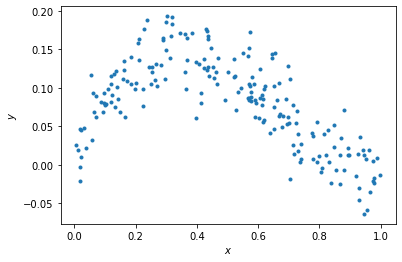

In [3]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) $x$ is uniformly distributed between 0 and 1 (1 excluded).

(2) $\epsilon$ is normally distributed with $\mu$ = 0 and $\sigma$ = 0.03. 

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [4]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]
xhat = xhat.T # xhat Nx2 
x_p = np.matmul(np.linalg.inv(np.matmul(np.transpose(xhat), xhat)), np.transpose(xhat)) #(X.TX)^-1X.T
theta = np.matmul(x_p, y) # #(X.TX)^-1X.Ty
print(theta)
# ================== #
# END YOUR CODE HERE #
# ================== #

[-0.10599633  0.13315817]


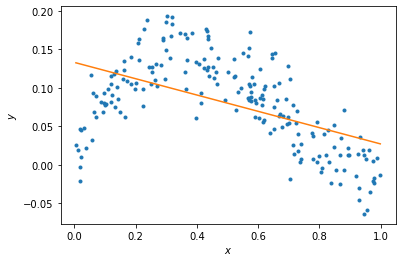

In [5]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) Underfit the data since data seems to be more complex than our fit. (3 dimensional)

(2) Polynomial of higher degree can be used to improve fitting.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [6]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.
xhats.append(xhat)
for i in range(0,N):
  if i != 0:
    xhats.append(np.hstack((x.reshape(-1,1)**(i+1), x_hat)))

  x_hat = xhats[i]
  x_p = np.matmul(np.linalg.inv(np.matmul(np.transpose(x_hat),x_hat)), np.transpose(x_hat))
  thetas.append(np.matmul(x_p, y))
  
    

print(thetas)
# ================== #
# END YOUR CODE HERE #
# ================== #

[array([-0.10599633,  0.13315817]), array([-0.48023061,  0.36743967,  0.05521084]), array([ 0.8843808 , -1.82077417,  0.91178032,  0.00979068]), array([ 0.14080037,  0.60466289, -1.64250929,  0.87250485,  0.01175321]), array([ 0.52432591, -1.164568  ,  1.76052438, -2.07430275,  0.93373916,
        0.009716  ])]


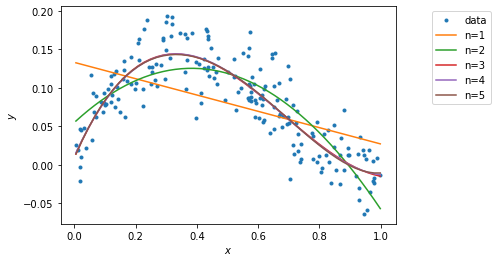

In [7]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [8]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
for i in range(0,N):
  theta = thetas[i]
  xhat = xhats[i]
  yhat = np.matmul(xhat,theta)
  error = np.sum((yhat - y)**2)/2
  training_errors.append(error)

print("Polynomial with the best training error: ", np.argmin(training_errors) + 1,"th degree polynomial.")
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Polynomial with the best training error:  5 th degree polynomial.
Training errors are: 
 [0.2379961088362701, 0.10924922209268528, 0.08169603801105368, 0.08165353735296982, 0.08161479195525295]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) Polynomial with the best training error is 5th degree polynomial

(2) Higher degree polynomials have higher flexibility to fit the training data since they have more parameters to be trained.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

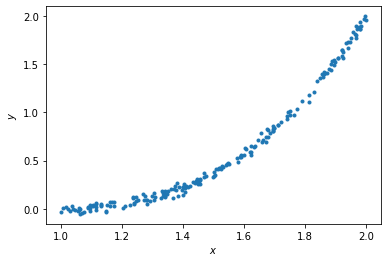

In [9]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [10]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

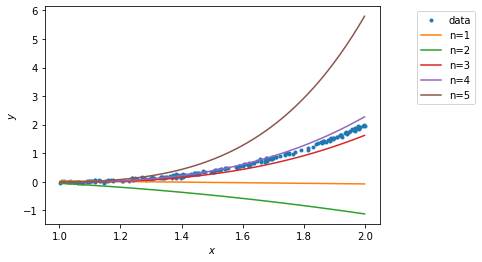

In [11]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [12]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in range(0,N):
  theta = thetas[i]
  xhat = (xhats[i]).T
  yhat = np.matmul(xhat,theta)
  error = sum((yhat - y)**2)/2
  testing_errors.append(error)

print("Polynomial with the best training error: ", np.argmin(testing_errors) + 1,"th degree polynomial.")
# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Polynomial with the best training error:  4 th degree polynomial.
Testing errors are: 
 [80.86165184550579, 213.19192445057894, 3.1256971084092977, 1.1870765211189493, 214.91021748653225]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) Polynomial with the best training error is 4th degree polynomial.

(2) Polynomial models with orders 5 and higher tend to fit the error introduced in the first section which is called also overfitting. Therefore, these polynomials can not perform well to unseen test data since error samples are different.